In [1]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
# from keras.utils import np_utils
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [2]:
cv2.__version__

'3.4.2'

In [3]:
train_dir = './input/fruits-360/Training'
test_dir = './input/fruits-360/Test'

np.random.seed(1234)
directory=train_dir
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [4]:
directory2=test_dir
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

In [5]:
dico = []

for i in range(len(all_arrays)):
    feature, label = all_arrays[i]
    img = feature
    surf = cv2.xfeatures2d.SURF_create()
    kp, des = surf.detectAndCompute(img, None)

    for d in des:
        dico.append(d)

In [6]:
from sklearn.cluster import MiniBatchKMeans
k = np.size(classes) * 10
batch_size = np.size(all_arrays) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)

C:\Users\Ivan\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Init 1/3 with method: k-means++
Inertia for init 1/3: 5057.300209
Init 2/3 with method: k-means++
Inertia for init 2/3: 5014.246799
Init 3/3 with method: k-means++
Inertia for init 3/3: 5065.756911
Minibatch iteration 1/500: mean batch inertia: 0.065431, ewa inertia: 0.065431 
Minibatch iteration 2/500: mean batch inertia: 0.064659, ewa inertia: 0.065098 
Minibatch iteration 3/500: mean batch inertia: 0.064231, ewa inertia: 0.064724 
Minibatch iteration 4/500: mean batch inertia: 0.064221, ewa inertia: 0.064507 
Minibatch iteration 5/500: mean batch inertia: 0.064415, ewa inertia: 0.064468 
Minibatch iteration 6/500: mean batch inertia: 0.063672, ewa inertia: 0.064125 
Minibatch iteration 7/500: mean batch inertia: 0.063871, ewa inertia: 0.064015 
Minibatch iteration 8/500: mean batch inertia: 0.062797, ewa inertia: 0.063490 
Minibatch iteration 9/500: mean batch inertia: 0.064115, ewa inertia: 0.063759 
Minibatch iteration 10/500: mean batch inertia: 0.063968, ewa inertia: 0.063850 
M

In [7]:
kmeans.verbose = False

histo_list = []

for i in range(len(all_arrays)):
    feature, label = all_arrays[i]
    img = feature
    kp, des = surf.detectAndCompute(img, None)

    histo = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

In [8]:
from sklearn.neural_network import MLPClassifier
X = np.array(histo_list)
Y = []

# It's a way to convert species name into an integer
for feature,s in all_arrays:
    Y.append(s)

mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(X, Y)

Iteration 1, loss = 2.19418603
Iteration 2, loss = 2.13235165
Iteration 3, loss = 2.06697684
Iteration 4, loss = 1.99080465
Iteration 5, loss = 1.89948961
Iteration 6, loss = 1.79485211
Iteration 7, loss = 1.67954406
Iteration 8, loss = 1.56094850
Iteration 9, loss = 1.44415632
Iteration 10, loss = 1.33283585
Iteration 11, loss = 1.23041467
Iteration 12, loss = 1.13684031
Iteration 13, loss = 1.05386741
Iteration 14, loss = 0.98074593
Iteration 15, loss = 0.91562498
Iteration 16, loss = 0.85883187
Iteration 17, loss = 0.80896770
Iteration 18, loss = 0.76502118
Iteration 19, loss = 0.72525388
Iteration 20, loss = 0.69012697
Iteration 21, loss = 0.65870407
Iteration 22, loss = 0.63017191
Iteration 23, loss = 0.60375774
Iteration 24, loss = 0.58039147
Iteration 25, loss = 0.55850891
Iteration 26, loss = 0.53846041
Iteration 27, loss = 0.51990719
Iteration 28, loss = 0.50270902
Iteration 29, loss = 0.48682518
Iteration 30, loss = 0.47179932
Iteration 31, loss = 0.45805065
Iteration 32, los

MLPClassifier(max_iter=600000, verbose=True)

In [9]:
import csv
result_file = open("surf.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("img", 'class'))

for i in range(len(all_arrays2)):
    feature, label = all_arrays2[i]
    img = feature
    kp, des = surf.detectAndCompute(img, None)

    x = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp

    res = mlp.predict([x])
    row = []
    row.append(i)

#     for e in res[0]:
#         row.append(e)

    row.append(res[0])

    result_file_obj.writerow(row)

result_file.close()

## SVM

In [10]:
from sklearn.svm import SVC
X = np.array(histo_list)
Y = []

for feature,s in all_arrays:
    Y.append(s)

svm = SVC()
svm.fit(X, Y)

SVC()

In [11]:
import csv
result_file = open("surf_svm.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("img", 'class'))

for i in range(len(all_arrays2)):
    feature, label = all_arrays2[i]
    img = feature
    kp, des = surf.detectAndCompute(img, None)

    x = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp

    res = svm.predict([x])
    row = []
    row.append(i)

#     for e in res[0]:
#         row.append(e)

    row.append(res[0])

    result_file_obj.writerow(row)

result_file.close()

In [12]:
svm_res = pd.read_csv('./surf_svm.csv')
svm_res

,img,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1440,1440,8
1441,1441,8
1442,1442,8
1443,1443,8


In [13]:
y_test = []
for feature, label in all_arrays2:
    y_test.append(label)

In [14]:
y_pred = svm_res['class'].tolist()

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8532871972318339


In [16]:
print(classification_report(y_test, y_pred, target_names=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]))

                precision    recall  f1-score   support

Apple Golden 1       1.00      1.00      1.00       160
       Avocado       0.85      0.65      0.74       143
        Banana       0.97      0.99      0.98       166
      Cherry 1       0.99      0.97      0.98       164
         Cocos       0.84      0.76      0.80       166
          Kiwi       0.59      0.81      0.69       156
         Lemon       0.85      0.85      0.85       164
         Mango       0.83      0.72      0.77       166
        Orange       0.84      0.90      0.87       160

      accuracy                           0.85      1445
     macro avg       0.86      0.85      0.85      1445
  weighted avg       0.86      0.85      0.85      1445



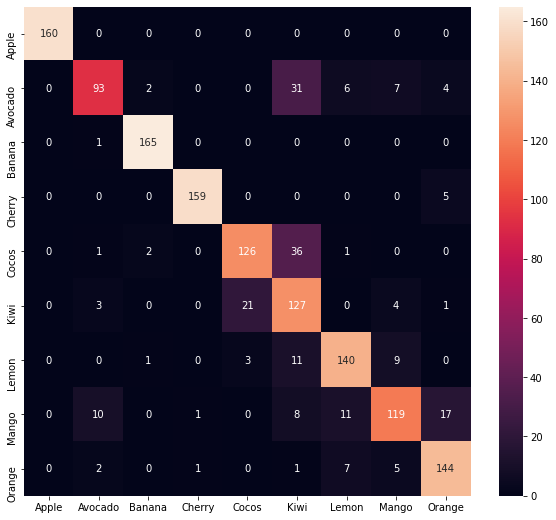

Accuracy with SURF + SVM: 85.33%


In [19]:
#confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
#compute conf mat
conf_mat=confusion_matrix(y_test,y_pred)
#plot the con mat
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
precision = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy with SURF + SVM: {0:.2f}%".format(precision))